In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_diabetes
import pandas as pd

In [2]:
diabetes = pd.read_csv('diabetes.csv')

X = diabetes.drop(columns = 'Outcome')
y = diabetes['Outcome']

In [3]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [5]:
print(X.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [6]:
print(y.head())

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

rf_clf = RandomForestClassifier(max_features=2, n_estimators = 100, bootstrap = True)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.70      0.57      0.63        81

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



In [9]:
import shap 
import matplotlib.pyplot as plt

shap.initjs()

explainer = shap.TreeExplainer(rf_clf)

shap_val = explainer.shap_values(X_test)

Variable Importance Plot - Global Interpretation


d:\AnacondaNavigator\Lib\site-packages\shap\plots\_beeswarm.py:1145: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
d:\AnacondaNavigator\Lib\site-packages\shap\plots\_beeswarm.py:753: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


<Figure size 640x480 with 0 Axes>

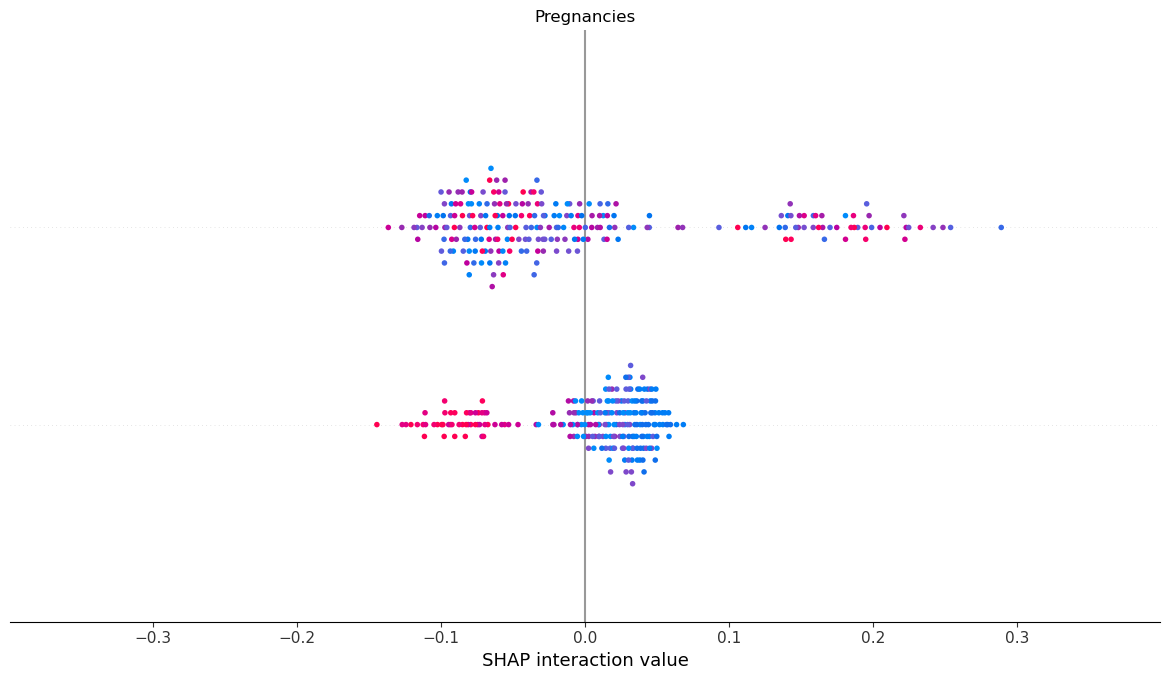

In [11]:
print("Variable Importance Plot - Global Interpretation")
fig = plt.figure()
shap.summary_plot(shap_val, X_test)

d:\AnacondaNavigator\Lib\site-packages\shap\plots\_beeswarm.py:1145: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
d:\AnacondaNavigator\Lib\site-packages\shap\plots\_beeswarm.py:753: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


<Figure size 640x480 with 0 Axes>

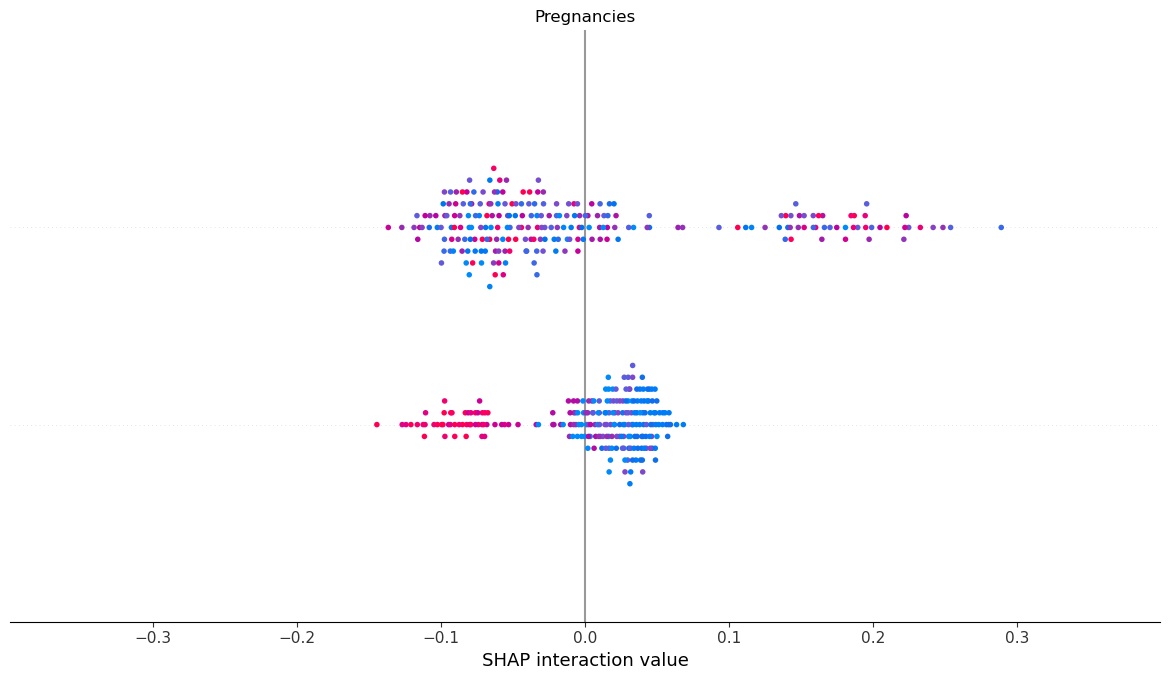

In [15]:
shap.summary_plot(shap_val[:], X_test)

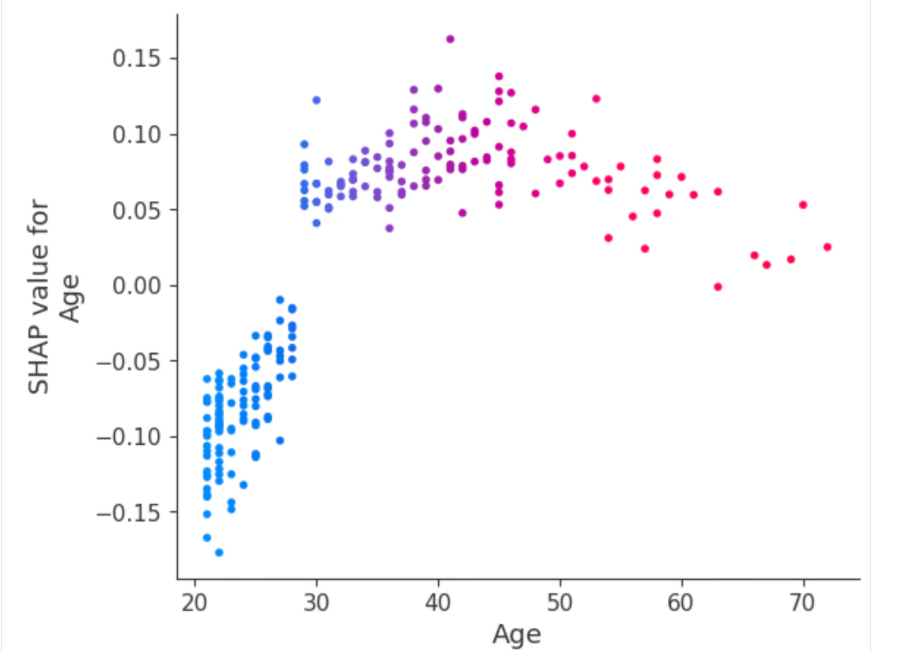

In [17]:
from lime.lime_tabular import LimeTabularExplainer

class_names = ["Has Diabetes", "No diabetes"]

feature_names = list(X_train.columns)

explainer = LimeTabularExplainer(X_train.values, feature_names = feature_names, class_names = class_names, mode = 'classification')

In [19]:
print(explainer)

model specific methods

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [22]:
y_pred = dt_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       150
           1       0.65      0.48      0.55        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



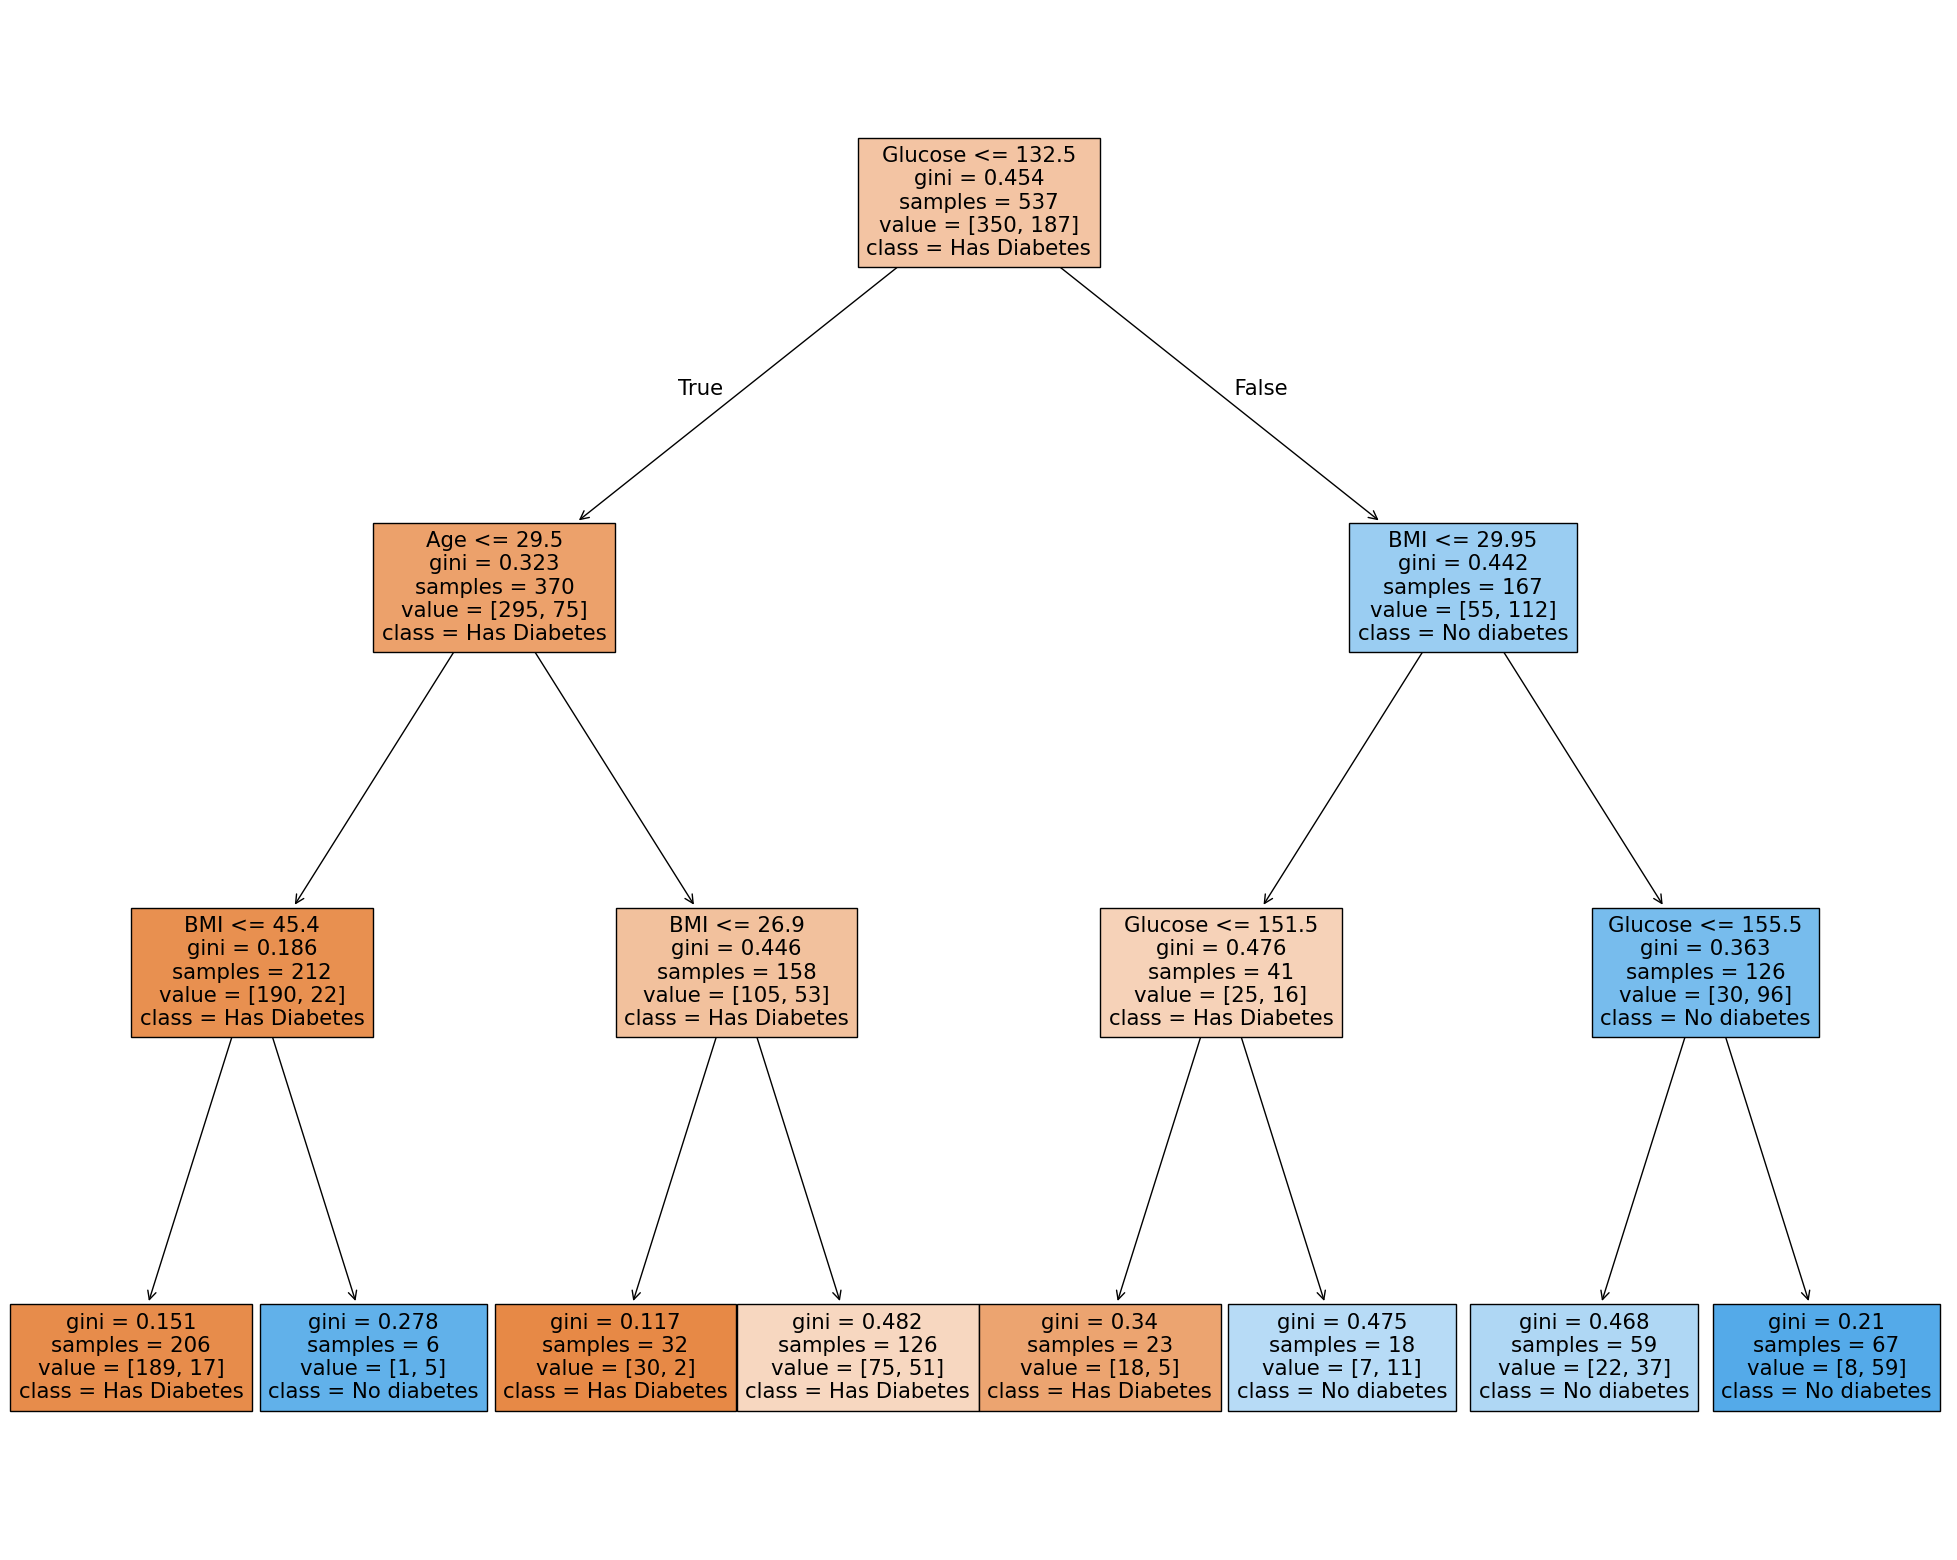

In [24]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_clf, feature_names = feature_names, class_names = class_names, filled = True)